# Kakovost življenja v EU

Pri projektu bomo analizirali oceno kakovosti življenja prebivalcev različnih držav Evropske unije. Zanima nas kateri faktorji npr. BDP na prebivalca države, kvaliteta šolskega sistema, mere neenakosti, občutek varnosti prebivalca, ure dela tedensko oz. work-life balance... najmočneje vplivajo na kakovost življenja posameznika.

Podatke bomo večinoma dobivali iz Eurostata, saj imajo veliko kvalitetnih podatkov o različnih državah Evropske unije, ki jih portal kot je OPSI nima.

## Uvoz podatkov

Opomba: Če podatkov ni je namesto podatka tam število 0.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import *


#Uvoz podatkov v obliki pandas dataframe
dropoutsCsv = pd.read_csv('./Data/Dropouts.csv')  # Odstotek populacije ki pusti šolo
equalityIndexCsv = pd.read_csv('./Data/EqualityIndex.csv')  # Equality index
emigrationCsv = pd.read_csv('./Data/emigration.csv')  # Število ljudi ki se je odselilo
gdpPerCapitaCsv = pd.read_csv('./Data/Gdp.csv')  # Gross domestic produce per capita
inflationCsv = pd.read_csv('./Data/Inflation.csv')  # Odstotek inflacije
migrationCsv = pd.read_csv('./Data/migration.csv')  # Število ljudi ki se je priselilo
minimumWageCsv = pd.read_csv('./Data/Minimal wage.csv')  # Minimalna bruto plača
unemploymentCsv = pd.read_csv('./Data/unenployment(procent populacije).csv')  # Nezaposlen odstotek odrasle populacije
workingHoursCsv = pd.read_csv('./Data/WorkingHoursWeekly.csv')  # Povprečno število delavnih ur na teden
qualityOfLifeCsv = pd.read_csv('./Data/QOL_Index.csv') # QOL index

#Tole je iracunana mnozica preseka drzav, ki se pojavljajo v vseh csv datotekah
#Postopek racunanja sem pobrisal

obravnavaneDrzave = {'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom'}


#Brisanje vrstic z odvecnimi drzavami
for index, row in dropoutsCsv.iterrows():
    if row['Drzava'] not in obravnavaneDrzave:
        dropoutsCsv.drop(index, inplace=True)

for index, row in emigrationCsv.iterrows():
    if row['Country'] not in obravnavaneDrzave:
        emigrationCsv.drop(index, inplace=True)

for index, row in equalityIndexCsv.iterrows():
    if row['Drzava'] not in obravnavaneDrzave:
        equalityIndexCsv.drop(index, inplace=True)

for index, row in gdpPerCapitaCsv.iterrows():
    if row['TIME'] not in obravnavaneDrzave:
        gdpPerCapitaCsv.drop(index, inplace=True)

for index, row in inflationCsv.iterrows():
    if row['TIME'] not in obravnavaneDrzave:
        inflationCsv.drop(index, inplace=True)

for index, row in migrationCsv.iterrows():
    if row['country'] not in obravnavaneDrzave:
        migrationCsv.drop(index, inplace=True)

for index, row in minimumWageCsv.iterrows():
    if row['country'] not in obravnavaneDrzave:
        minimumWageCsv.drop(index, inplace=True)

for index, row in unemploymentCsv.iterrows():
    if row['country'] not in obravnavaneDrzave:
        unemploymentCsv.drop(index, inplace=True)

for index, row in workingHoursCsv.iterrows():
    if row['Country'] not in obravnavaneDrzave:
        workingHoursCsv.drop(index, inplace=True)


qualityOfLifeCsv = qualityOfLifeCsv.iloc[:, [1, 2]]

for index, row in qualityOfLifeCsv.iterrows():
    if row['Country'] not in obravnavaneDrzave:
        qualityOfLifeCsv.drop(index, inplace=True)

qualityOfLifeCsv = qualityOfLifeCsv.sort_values(by="Country")
dropoutsCsv = dropoutsCsv.sort_values(by="Drzava")
equalityIndexCsv = equalityIndexCsv.sort_values(by="Drzava")
emigrationCsv = emigrationCsv.sort_values(by="Country")
gdpPerCapitaCsv = gdpPerCapitaCsv.sort_values(by="TIME")
inflationCsv = inflationCsv.sort_values(by="TIME")
migrationCsv = migrationCsv.sort_values(by="country")
minimumWageCsv = minimumWageCsv.sort_values(by="country")
unemploymentCsv = unemploymentCsv.sort_values(by="country")
workingHoursCsv = workingHoursCsv.sort_values(by="Country")


## Vizualizacije podatkov

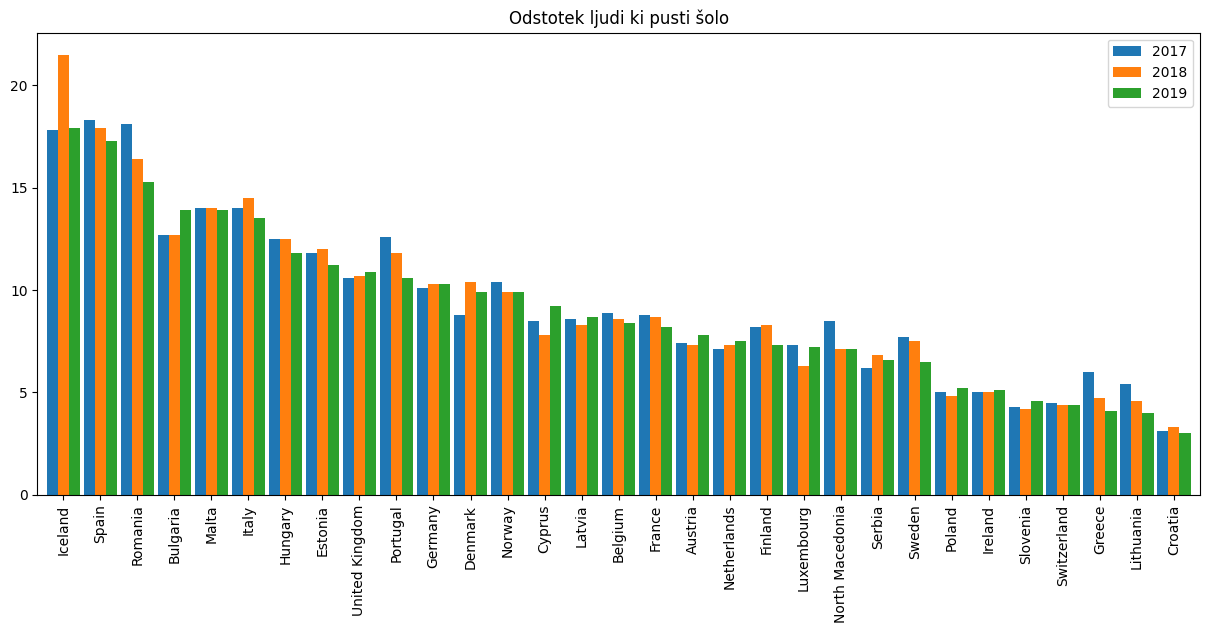

In [112]:
dropouts2019 = list(dropoutsCsv['2019'])
dropouts2018 = list(dropoutsCsv['2018'])
dropouts2017 = list(dropoutsCsv['2017'])
drzave = list(dropoutsCsv['Drzava'])
df = pd.DataFrame({'2017':dropouts2017, '2018':dropouts2018, '2019':dropouts2019}, index=drzave)
df_sorted = df.sort_values(by='2019', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Odstotek ljudi ki pusti šolo")
ax.figure.savefig('./Slike/dropouts.png')

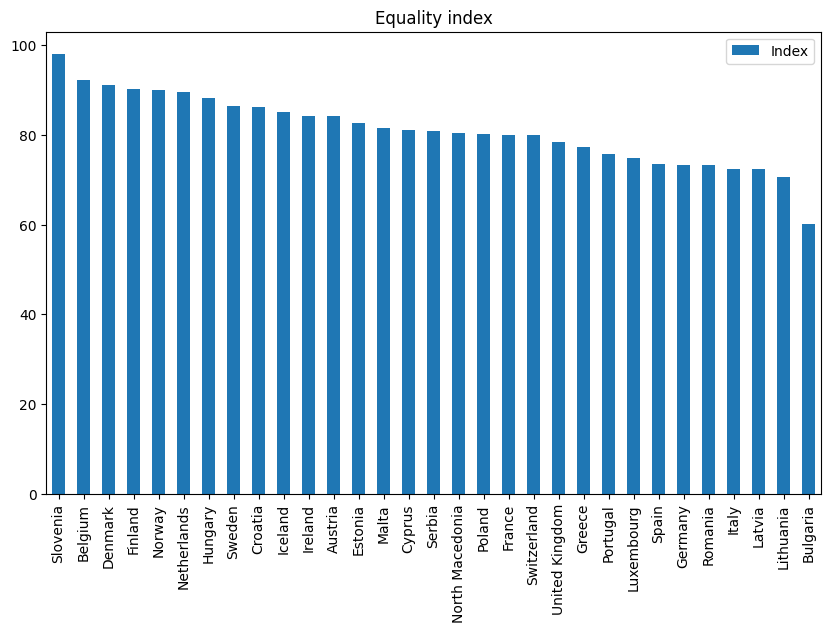

In [113]:
Index = list(equalityIndexCsv['Index'])
drzave = list(equalityIndexCsv['Drzava'])
df = pd.DataFrame({'Index':Index}, index=drzave)
df_sorted = df.sort_values(by='Index', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(10, 6), title="Equality index")
ax.figure.savefig('./Slike/EqualityIndex.png')

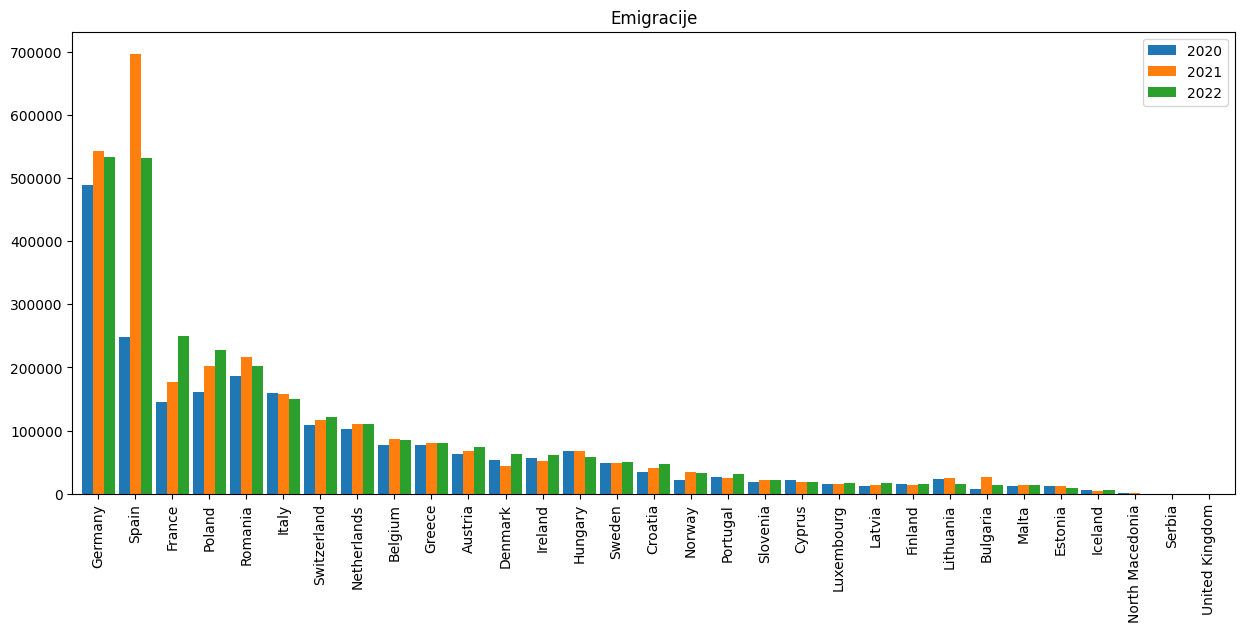

In [114]:
emigration2020 = list(emigrationCsv['2020'])
emigration2021 = list(emigrationCsv['2021'])
emigration2022 = list(emigrationCsv['2022'])
drzave = list(emigrationCsv['Country'])
df = pd.DataFrame({'2020':emigration2020, '2021':emigration2021, '2022':emigration2022}, index=drzave)
df_sorted = df.sort_values(by='2022', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Emigracije")
ax.figure.savefig('./Slike/emigration.png')

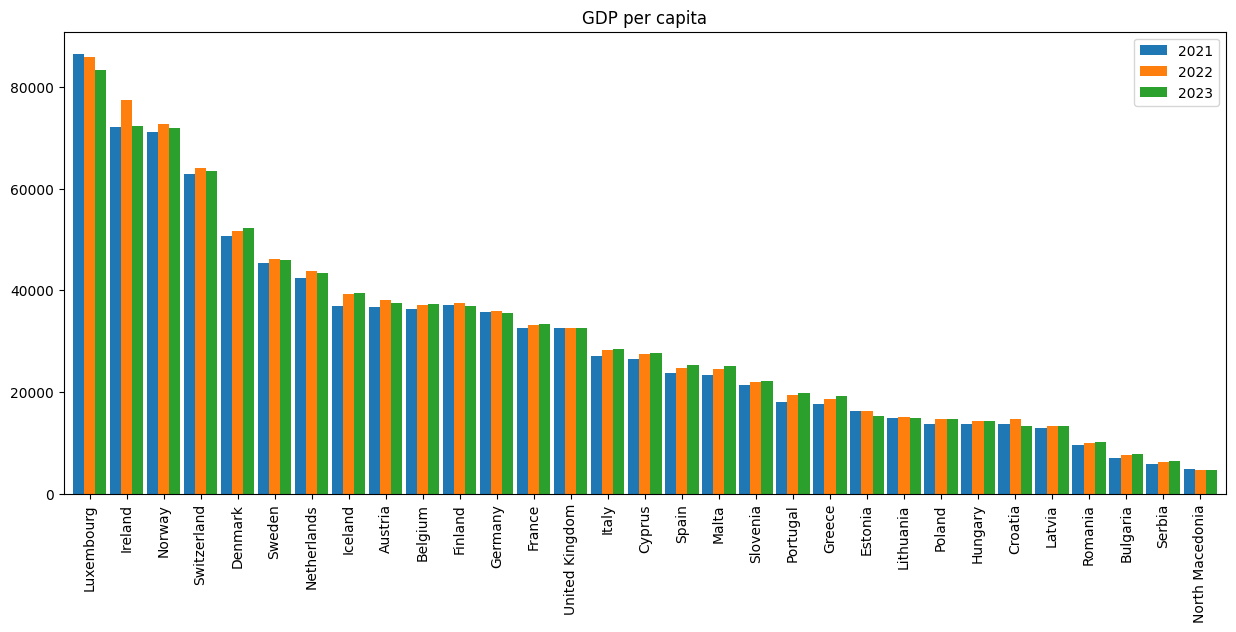

In [115]:
gdp2021 = [int(value) for value in gdpPerCapitaCsv['2021']]
gdp2022 = [int(value) for value in gdpPerCapitaCsv['2022']]
gdp2023 = [int(value) for value in gdpPerCapitaCsv['2023']]
drzave = list(gdpPerCapitaCsv['TIME'])
df = pd.DataFrame({'2021':gdp2021, '2022':gdp2022, '2023':gdp2023}, index=drzave)
df_sorted = df.sort_values(by='2023', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="GDP per capita")
ax.figure.savefig('./Slike/gdp.png')

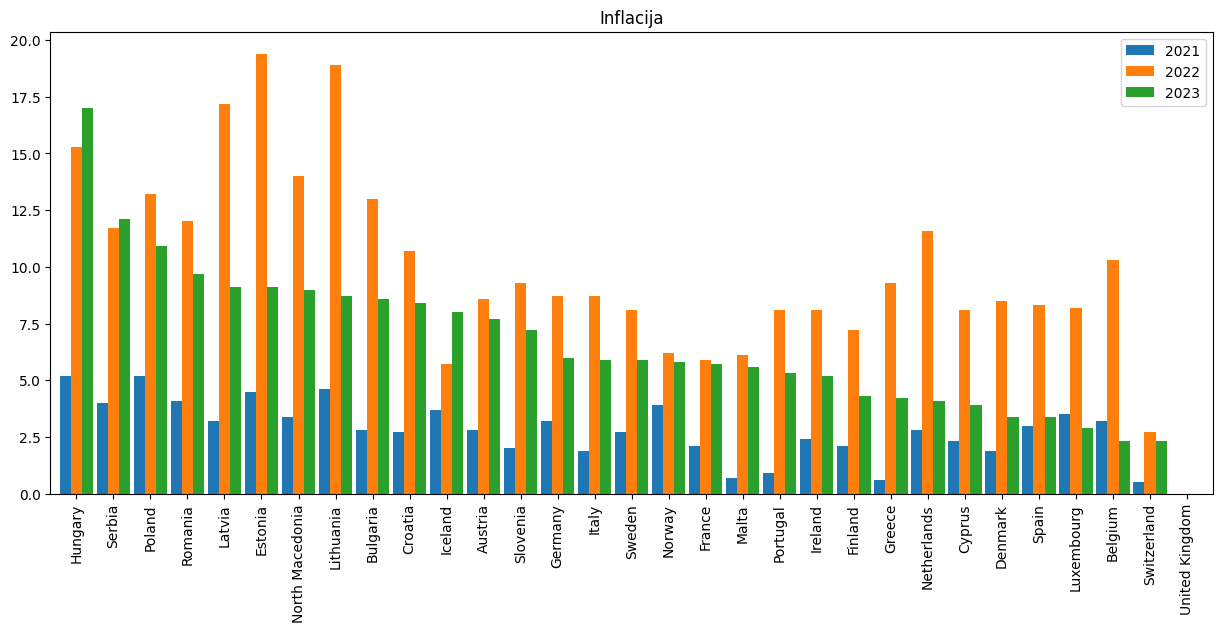

In [116]:
inflation2021 = [float(value) for value in inflationCsv['2021']]
inflation2022 = [float(value) for value in inflationCsv['2022']]
inflation2023 = [float(value) for value in inflationCsv['2023']]
drzave = list(inflationCsv['TIME'])
df = pd.DataFrame({'2021':inflation2021, '2022':inflation2022, '2023':inflation2023}, index=drzave)
df_sorted = df.sort_values(by='2023', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Inflacija")
ax.figure.savefig('./Slike/inflation.png')

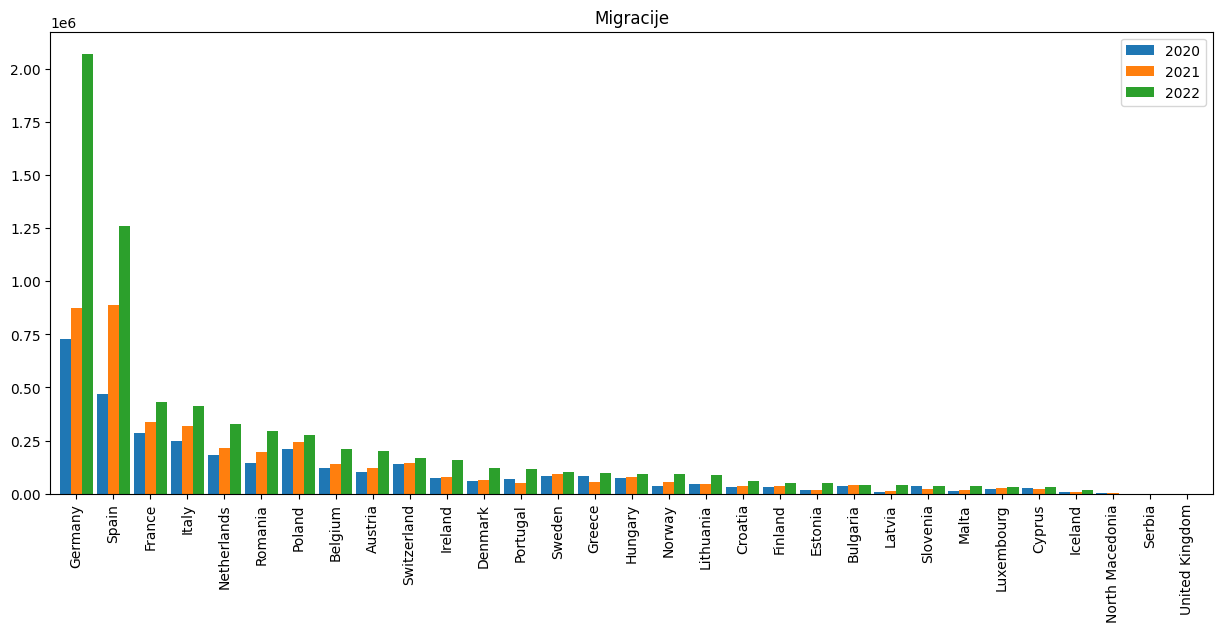

In [117]:
migration2021 = [int(value) for value in migrationCsv['2021']]
migration2022 = [int(value) for value in migrationCsv['2022']]
migration2020 = [int(value) for value in migrationCsv['2020']]
drzave = list(migrationCsv['country'])
df = pd.DataFrame({'2020':migration2020, '2021':migration2021, '2022':migration2022}, index=drzave)
df_sorted = df.sort_values(by='2022', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Migracije")
ax.figure.savefig('./Slike/migration.png')

In [118]:
minWage2024 = [float(value) for value in minimumWageCsv['2024']]
minWage2023b = [float(value) for value in minimumWageCsv['2023/S2']]
minWage2023a = [float(value) for value in minimumWageCsv['2023/S1']]
drzave = list(minimumWageCsv['country'])
df = pd.DataFrame({'2024':minWage2024, '2023/s2':minWage2023b, '2023/s1':minWage2023a}, index=drzave)
df_sorted = df.sort_values(by='2024', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Minimalna plača")
ax.figure.savefig('./Slike/minWage.png')

KeyError: '2023/S2'

In [ ]:
unemployment2024 = [float(value) for value in unemploymentCsv['2024']]
unemployment2022 = [float(value) for value in unemploymentCsv['2022']]
drzave = list(minimumWageCsv['country'])
df = pd.DataFrame({'2022':unemployment2022, '2024':unemployment2024}, index=drzave)
df_sorted = df.sort_values(by='2024', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Odstotek nezaposlene populacije")
ax.figure.savefig('./Slike/unemployment.png')

ValueError: Length of values (31) does not match length of index (62)

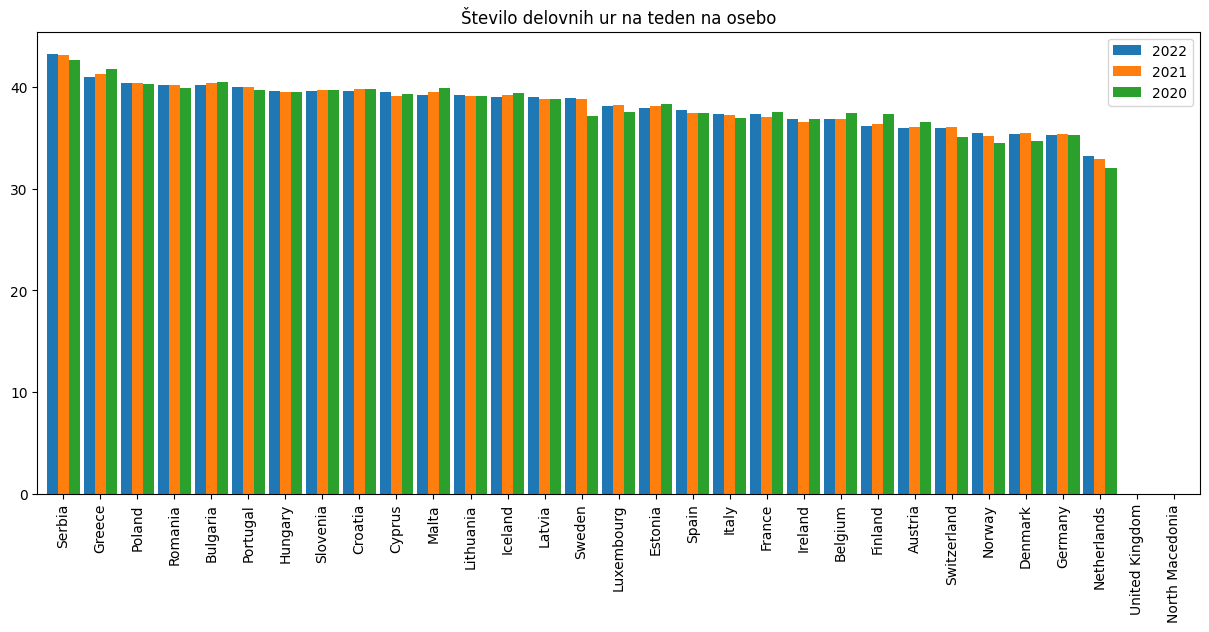

In [ ]:
workingHours2022 = [float(value) for value in workingHoursCsv['2022']]
workingHours2021 = [float(value) for value in workingHoursCsv['2021']]
workingHours2020 = [float(value) for value in workingHoursCsv['2020']]
drzave = list(workingHoursCsv['Country'])
df = pd.DataFrame({'2022':workingHours2022, '2021':workingHours2021, '2020':workingHours2020}, index=drzave)
df_sorted = df.sort_values(by='2022', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Število delovnih ur na teden na osebo")
ax.figure.savefig('./Slike/workingHours.png')

## Korelacija

In [ ]:
unemploymentCsv

,country,2022,2024
21,Austria,3.3,3.5
2,Belgium,3.4,3.4
3,Bulgaria,2.6,2.7
12,Croatia,4.1,3.6
14,Cyprus,4.8,4.4
5,Denmark,3.2,3.7
7,Estonia,4.1,4.7
27,Finland,4.6,5.0
11,France,4.6,4.7
6,Germany,2.2,2.1


In [119]:
def getAverage(dataframe):
    return dataframe.iloc[:, 1:].mean(axis=1, numeric_only=True)


dropoutsAvg = getAverage(dropoutsCsv)
emigrtionAvg = getAverage(emigrationCsv)
equalityIdxAvg = getAverage(equalityIndexCsv)
gdpAvg = getAverage(gdpPerCapitaCsv)
inflationAvg = getAverage(inflationCsv)
minWageAvg = getAverage(minimumWageCsv)
unemploymentPerThousandAvg = getAverage(unemploymentCsv)
workingHoursAvg = getAverage(workingHoursCsv)
qualityOfLifeAvg = getAverage(qualityOfLifeCsv)

def getCorrCoeff1(dataframe):
    return dataframe.corr(qualityOfLifeAvg)

def getCorrCoeff2(dataframe):
    return dataframe.corrwith(qualityOfLifeAvg, method='pearson')

corrDropouts = getCorrCoeff1(dropoutsAvg)
corrEmigration = getCorrCoeff1(emigrtionAvg)
corrEqualityIdxAvg = getCorrCoeff1(equalityIdxAvg)
corrGdp = getCorrCoeff1(gdpAvg)
corrInflation = getCorrCoeff1(inflationAvg)
corrMinWage = getCorrCoeff1(minWageAvg)
corrUnemployment = getCorrCoeff1(unemploymentPerThousandAvg)
corrWorkingHours = getCorrCoeff1(workingHoursAvg)

print(f"Korelacija med dropouts in QoL: %s" % corrDropouts)
print(f"Korelacija med emigrations in QoL: %s" % corrEmigration)
print(f"Korelacija med equiality indexom in QoL: %s" % corrEqualityIdxAvg)
print(f"Korelacija med GDP in QoL: %s" % corrGdp)
print(f"Korelacija med inflacijo in QoL: %s" % corrInflation)
print(f"Korelacija med minimalno plačo in QoL: %s" % corrMinWage)
print(f"Korelacija med nezaposlenostjo in QoL: %s" % corrUnemployment)
print(f"Korelacija med številom delavnih ur in QoL: %s" % corrWorkingHours)

TypeError: Series.corr() got an unexpected keyword argument 'numeric_only'